In [158]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Cleaning

In [160]:
#Reading Data
df = pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [161]:
#Seeing Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [162]:
#Checking for Null Values
for i in df.columns:
    null_values = df[i].isnull().sum()
    print(f'Number of missing value in column {i}: {null_values}')

Number of missing value in column invoice_no: 0
Number of missing value in column customer_id: 0
Number of missing value in column gender: 0
Number of missing value in column age: 0
Number of missing value in column category: 0
Number of missing value in column quantity: 0
Number of missing value in column price: 0
Number of missing value in column payment_method: 0
Number of missing value in column invoice_date: 0
Number of missing value in column shopping_mall: 0


In [163]:
#Checking for duplicates
for i in df.columns:
    duplicates = df[i].duplicated().sum()
    print(f'Number of duplicate value in column {i}: {duplicates}')

Number of duplicate value in column invoice_no: 0
Number of duplicate value in column customer_id: 0
Number of duplicate value in column gender: 99455
Number of duplicate value in column age: 99405
Number of duplicate value in column category: 99449
Number of duplicate value in column quantity: 99452
Number of duplicate value in column price: 99417
Number of duplicate value in column payment_method: 99454
Number of duplicate value in column invoice_date: 98660
Number of duplicate value in column shopping_mall: 99447


In [164]:
#Checking shape of data
df.shape

(99457, 10)

The data contains over than 90000 rows and 10 columns. Next lets change the invoive_date data format to datetime. Before that lets take a look at the values first

In [165]:
#Checking invoice date value
df.invoice_date.unique()

array(['5/8/2022', '12/12/2021', '9/11/2021', '16/05/2021', '24/10/2021',
       '24/05/2022', '13/03/2022', '13/01/2021', '4/11/2021',
       '22/08/2021', '25/12/2022', '28/10/2022', '31/07/2022',
       '17/11/2022', '3/6/2022', '7/11/2021', '16/01/2021', '5/1/2022',
       '26/07/2021', '7/3/2023', '15/02/2023', '1/5/2021', '18/06/2022',
       '26/10/2021', '16/12/2022', '20/04/2022', '10/10/2022',
       '23/08/2022', '29/04/2021', '4/7/2022', '21/11/2021', '23/02/2022',
       '11/7/2021', '30/08/2022', '4/1/2023', '21/06/2022', '8/7/2022',
       '27/02/2022', '19/12/2022', '10/9/2021', '14/02/2022',
       '28/04/2022', '20/06/2022', '21/04/2022', '9/12/2022', '12/1/2023',
       '7/11/2022', '7/2/2022', '13/06/2021', '23/08/2021', '24/02/2023',
       '22/02/2022', '12/3/2021', '2/1/2022', '26/11/2021', '21/04/2021',
       '23/06/2021', '14/12/2021', '9/6/2022', '5/2/2021', '6/3/2022',
       '9/5/2022', '17/10/2022', '22/01/2022', '14/03/2021', '27/04/2022',
       '19/11/2

In [166]:
#Changing data type
df['invoice_date'] = df['invoice_date'].apply(pd.to_datetime)
#Checking after changing data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


## EDA

### Which group of people shops the most?

In [167]:
#Looking into gender
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [168]:
#Looking into age values
df.age.unique()

array([28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 67, 25, 24, 65, 42, 46,
       23, 27, 52, 44, 51, 50, 68, 43, 59, 54, 48, 40, 41, 19, 18, 22, 61,
       45, 64, 33, 63, 34, 47, 38, 57, 30, 26, 62, 39, 55, 56, 35, 31, 37,
       58])

In [169]:
#Adding age categories
def age_category(a):
    if a<1:
        return 'Infants'
    elif 1 <= a <=12:
        return 'Children'
    elif 13 <= a <=17:
        return 'Adolescents'
    elif 18 <= a <65:
        return 'Adults'
    else:
        return 'Older Adults'
df['age_category'] = df.age.apply(lambda x: age_category(x))
#Checking age category values
df.age_category.unique()

array(['Adults', 'Older Adults'], dtype=object)

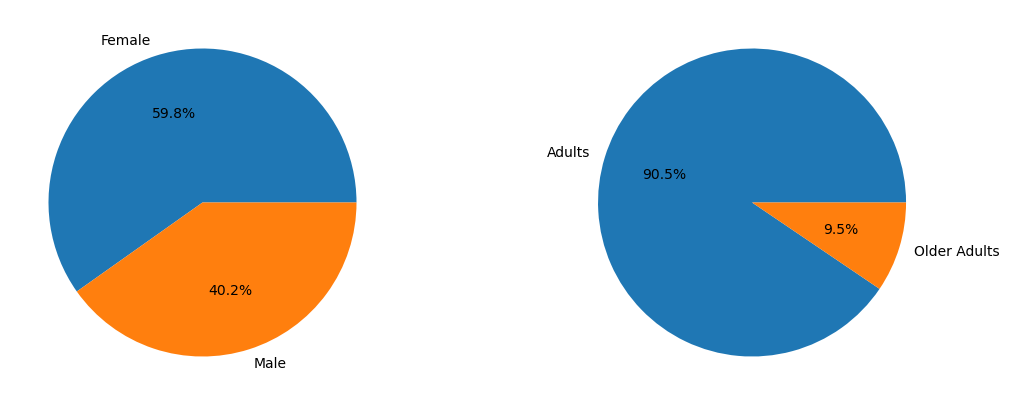

In [170]:
#Visualizing Customer Profile
col = ['gender', 'age_category']
fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
for i in range(len(col)):
    df_group = df.groupby([col[i]])['customer_id'].nunique().reset_index()
    axs[i].pie(df_group['customer_id'], labels = df_group[col[i]], autopct = '%1.1f%%')

### What is the favorite payment method?

Now lets move on the which is the favorite payment methods. Before starting the analysis, lets see the values first

In [171]:
#Payment method Values
df.payment_method.unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

<Figure size 640x480 with 0 Axes>

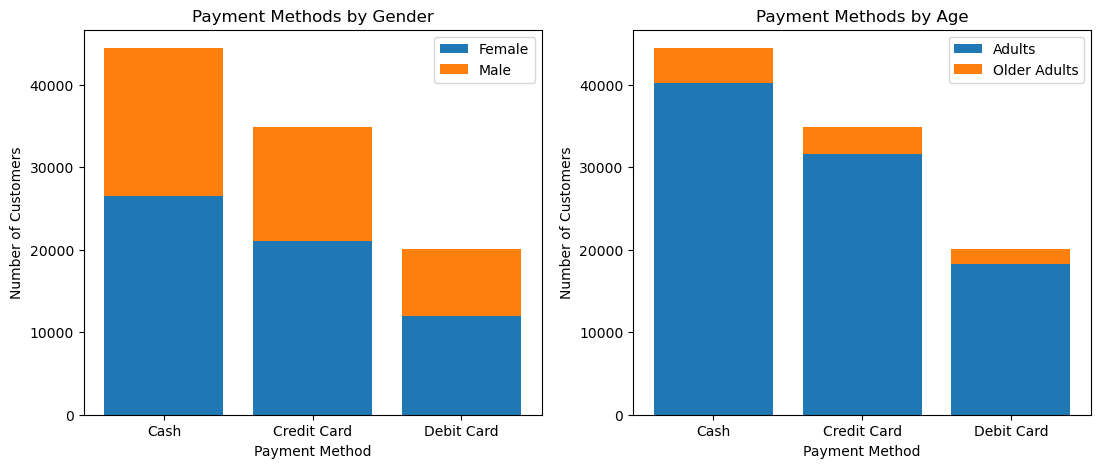

In [172]:
#Visualizing Payment Method
col = ['gender', 'age_category']
title= ['Gender', 'Age']
plt.tight_layout(pad = 2)
fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
for i in range(len(col)):
    df_col = df[col[i]]
    df_new = df.pivot_table(index = 'payment_method', columns = col[i],
                             values = 'customer_id', aggfunc = 'nunique').reset_index()
    list_item = df_col.unique()
    axs[i].bar(df_new['payment_method'], df_new[list_item[0]] , label = list_item[0])
    bottom = []
    for u in range(len(list_item)-1):
        bottom.extend(df_new[list_item[u]])
        axs[i].bar(df_new['payment_method'], df_new[list_item[u+1]], label = list_item[u+1], bottom = bottom)
    axs[i].legend()
    axs[i].set_xlabel('Payment Method')
    axs[i].set_ylabel('Number of Customers')
    axs[i].set_title(f'Payment Methods by {title[i]}')
    

## Which shopping mall is the favorite? 

In [173]:
df.shopping_mall.unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

<Figure size 640x480 with 0 Axes>

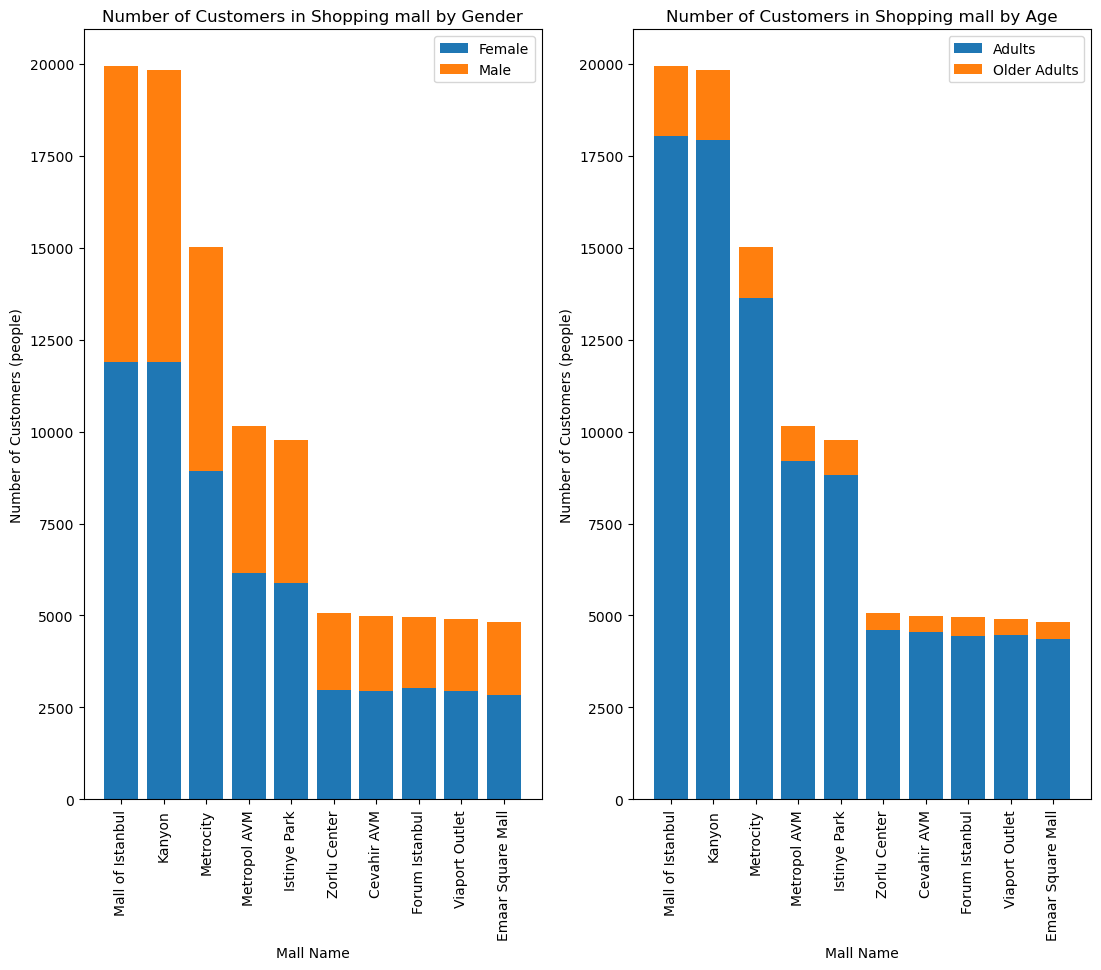

In [174]:
#Mall Shoppers
col = ['gender', 'age_category']
title = ['Gender', 'Age']
plt.tight_layout(pad=5)
fig, axs = plt.subplots(ncols = 2, figsize= (13,10))
for item in range(len(col)):
    unique_value = df[col[item]].unique()
    df_group = df.pivot_table(index = 'shopping_mall', columns = col[item],
                             values ='customer_id', aggfunc = 'nunique').reset_index()
    df_group['Total'] = df_group[unique_value].sum(axis=1)
    df_group = df_group.sort_values(by = 'Total', ascending = False)

    
    bottom = []
    axs[item].bar(df_group['shopping_mall'], df_group[unique_value[0]], label = unique_value[0])
    for value in range(len(unique_value)-1):
        bottom.extend(df_group[unique_value[value]])
        axs[item].bar(df_group['shopping_mall'], df_group[unique_value[value+1]],label = unique_value[value+1],bottom = bottom)
    axs[item].tick_params(axis='x', labelrotation=90)    
    axs[item].legend()
    axs[item].set(title = f'Number of Customers in Shopping mall by {title[item]}',
                 xlabel = 'Mall Name', ylabel = 'Number of Customers (people)')

## What are the products available at the mall?

In [175]:
#Looking into category value
df.category.unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

[Text(0.5, 1.0, 'Product on Sale')]

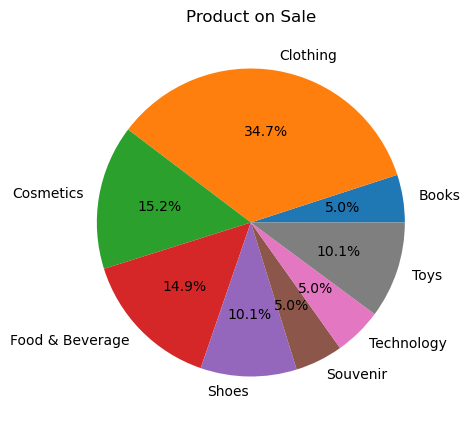

In [176]:
#Number of Porducts on Sale
fig, ax = plt.subplots(figsize = (13,5))
df_tes = df.groupby(['category'])['invoice_no'].nunique().reset_index()
ax.pie(df_tes['invoice_no'], labels = df_tes['category'], autopct = '%1.1f%%')
ax.set(title = 'Product on Sale')

Most of the products sold are clothes. The least of the products sold are technology and souvenir. Lets see if there are any difference in the mall itself

In [177]:
#Visualizing Category by Mall
df_group = df.pivot_table(index = 'shopping_mall', columns = 'category',
                         values = 'invoice_no', aggfunc = 'nunique')\
.reset_index()
df_group['Total'] = df_group[df.category.unique()].sum(axis = 1)
df_group = df_group.sort_values(by = 'Total', ascending = False)
px.bar(df_group, x='shopping_mall', y = df.category.unique(), title=
      'Number of Products on Sale in Each Mall', labels = {'shopping_mall':'Shopping Mall',
                                                          'value':'Number of Products'})

## Favorite Time People Go Shopping

In [178]:
#Seeing invoice dates
df.invoice_date.unique()

array(['2022-05-08T00:00:00.000000000', '2021-12-12T00:00:00.000000000',
       '2021-09-11T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-10-24T00:00:00.000000000', '2022-05-24T00:00:00.000000000',
       '2022-03-13T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-04-11T00:00:00.000000000', '2021-08-22T00:00:00.000000000',
       '2022-12-25T00:00:00.000000000', '2022-10-28T00:00:00.000000000',
       '2022-07-31T00:00:00.000000000', '2022-11-17T00:00:00.000000000',
       '2022-03-06T00:00:00.000000000', '2021-07-11T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2022-05-01T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2023-07-03T00:00:00.000000000',
       '2023-02-15T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2022-06-18T00:00:00.000000000', '2021-10-26T00:00:00.000000000',
       '2022-12-16T00:00:00.000000000', '2022-04-20T00:00:00.000000000',
       '2022-10-10T00:00:00.000000000', '2022-08-23

In [179]:
#Changing date formats
df['day'] = df['invoice_date'].apply(lambda x: x.strftime('%A'))
df['month'] = df['invoice_date'].apply(lambda x: x.month)
df['year'] = df['invoice_date'].apply(lambda x: x.year)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,day,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,Adults,Sunday,5,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Adults,Sunday,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,Adults,Saturday,9,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Older Adults,Sunday,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,Adults,Sunday,10,2021


In [180]:
df.day.unique()

array(['Sunday', 'Saturday', 'Tuesday', 'Wednesday', 'Friday', 'Thursday',
       'Monday'], dtype=object)

<Figure size 640x480 with 0 Axes>

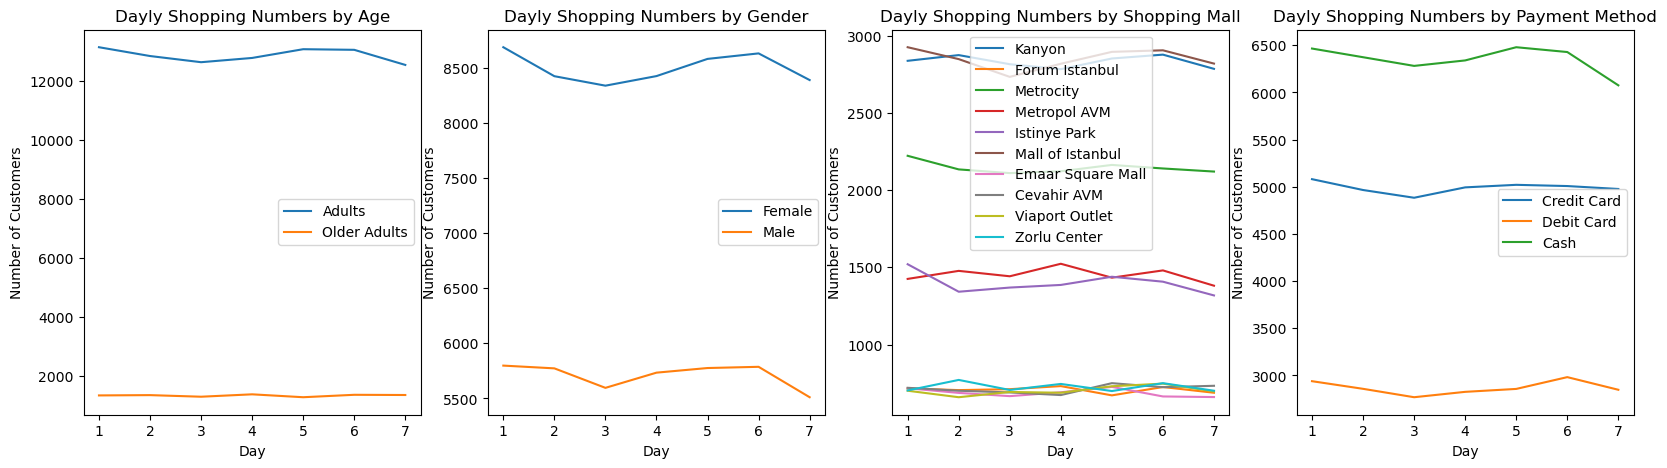

In [181]:
#Peak Day
#Peak Month
col = ['age_category', 'gender', 'shopping_mall', 'payment_method']
title = ['Age', 'Gender', 'Shopping Mall', 'Payment Method']
list_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday','Sunday']
df['new_day'] = df['day'].replace(list_day, [1,2,3,4,5,6,7])
df['new_day'] = df.new_day.astype('float')
plt.tight_layout(pad = 5)
fig, axs = plt.subplots(ncols = 4, figsize = (20,5))
for i in range(len(col)):
    df_group = df.pivot_table(index = 'new_day', columns = col[i],
                             values = 'invoice_no', aggfunc = 'nunique')\
    .reset_index()
    col_un = df[col[i]].unique()
    for u in range(len(col_un)):
        axs[i].plot(df_group['new_day'], df_group[col_un[u]], label = col_un[u])
        axs[i].legend()
        axs[i].set(title = f'Dayly Shopping Numbers by {title[i]}',
                  xlabel = 'Day', ylabel='Number of Customers')

<Figure size 640x480 with 0 Axes>

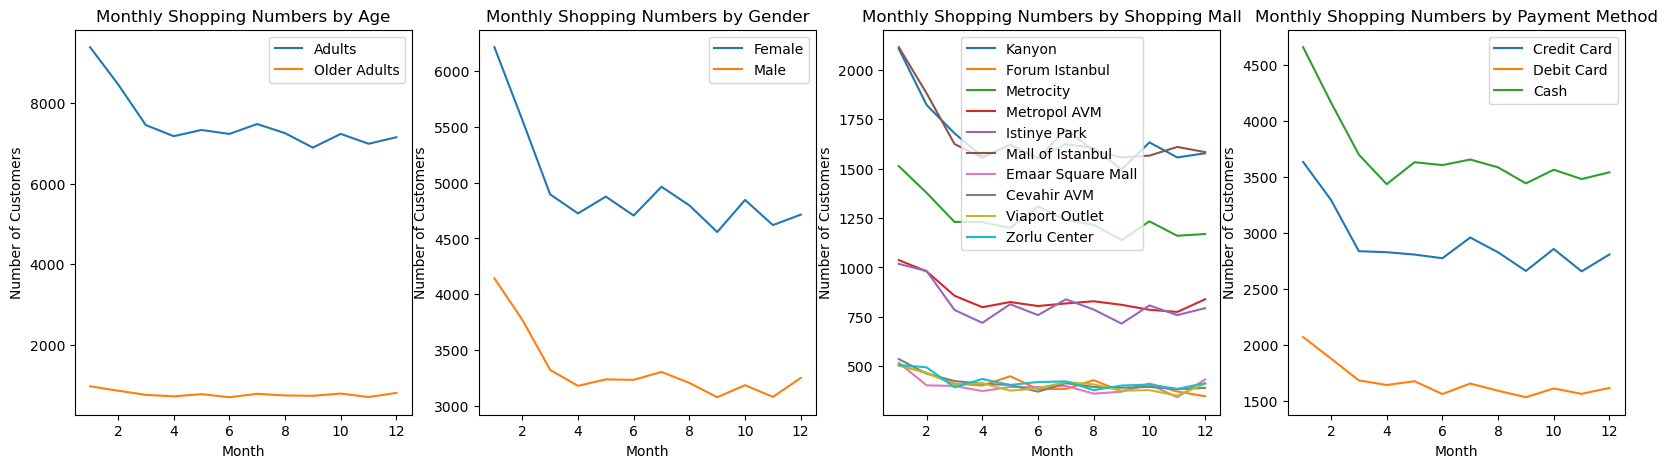

In [182]:
#Peak Month
col = ['age_category', 'gender', 'shopping_mall', 'payment_method']
title = ['Age', 'Gender', 'Shopping Mall', 'Payment Method']
plt.tight_layout(pad = 5)
fig, axs = plt.subplots(ncols = 4, figsize = (20,5))
for i in range(len(col)):
    df_group = df.pivot_table(index = 'month', columns = col[i],
                             values = 'invoice_no', aggfunc = 'nunique')\
    .reset_index()
    col_un = df[col[i]].unique()
    for u in range(len(col_un)):
        axs[i].plot(df_group['month'], df_group[col_un[u]], label = col_un[u])
        axs[i].legend()
        axs[i].set(title = f'Monthly Shopping Numbers by {title[i]}',
                  xlabel = 'Month', ylabel='Number of Customers')

In [183]:
#checking year
df.year.unique()

array([2022, 2021, 2023])

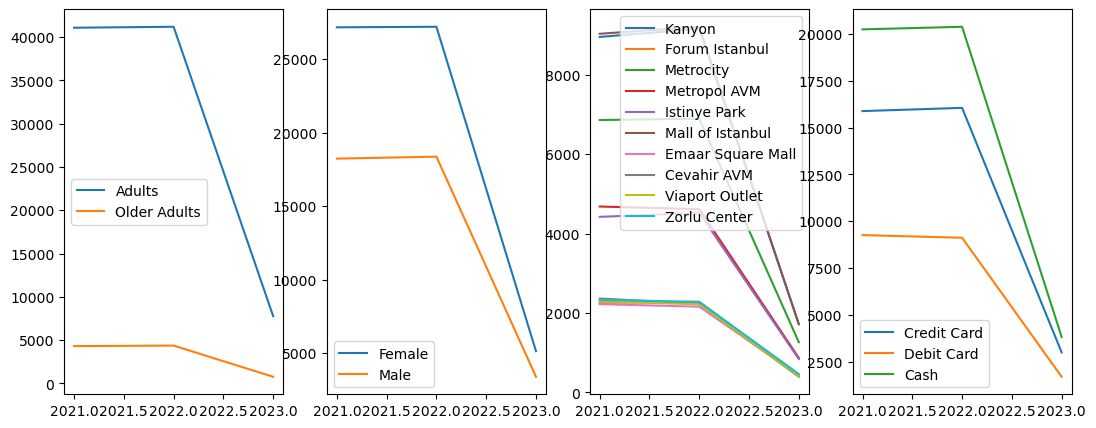

In [184]:
#Peak Year
col = ['age_category', 'gender', 'shopping_mall', 'payment_method']
fig, axs = plt.subplots(ncols = 4, figsize = (13,5))
for i in range(len(col)):
    df_group = df.pivot_table(index = 'year', columns = col[i],
                             values = 'invoice_no', aggfunc = 'nunique')\
    .reset_index()
    col_un = df[col[i]].unique()
    for u in range(len(col_un)):
        axs[i].plot(df_group['year'], df_group[col_un[u]], label = col_un[u])
        axs[i].legend()

## Quantity and the Total Payment of The Product

In [185]:
#Looking into quantity values
df.quantity.unique()

array([5, 3, 1, 4, 2])

In [186]:
#Looking Into Price Values
df.price.unique()

array([1.50040e+03, 1.80051e+03, 3.00080e+02, 3.00085e+03, 6.06000e+01,
       4.06600e+01, 6.00160e+02, 9.00240e+02, 1.04600e+01, 1.51500e+01,
       1.43360e+02, 3.03000e+01, 1.56900e+01, 5.23000e+00, 5.25000e+03,
       7.57500e+01, 7.16800e+01, 2.03300e+02, 2.40068e+03, 1.21980e+02,
       1.07520e+02, 1.20032e+03, 8.13200e+01, 4.54500e+01, 4.20000e+03,
       1.62640e+02, 5.86500e+01, 2.61500e+01, 3.51900e+01, 2.09200e+01,
       2.34600e+01, 2.10000e+03, 3.58400e+01, 3.15000e+03, 1.79200e+02,
       6.00170e+02, 1.05000e+03, 1.20034e+03, 4.69200e+01, 1.17300e+01])

In [187]:
#Creating Total Payment
df['total_payment'] = df.price * df.quantity

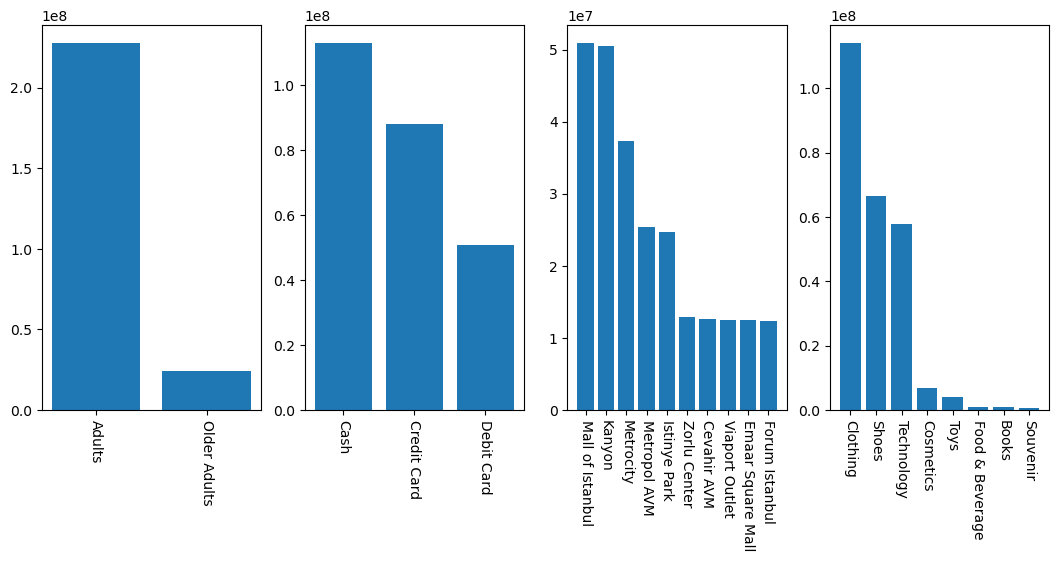

In [188]:
#Payment Total
col = ['age_category', 'payment_method', 'shopping_mall', 'category']
fig, axs = plt.subplots(ncols = 4,figsize = (13,5))
for i in range(len(col)):
    df_group = df.groupby(col[i])['total_payment'].sum().reset_index()\
    .sort_values(by = 'total_payment', ascending=False)
    axs[i].tick_params(axis = 'x', rotation = 270)
    axs[i].bar(df_group[col[i]], df_group['total_payment'])

<Figure size 640x480 with 0 Axes>

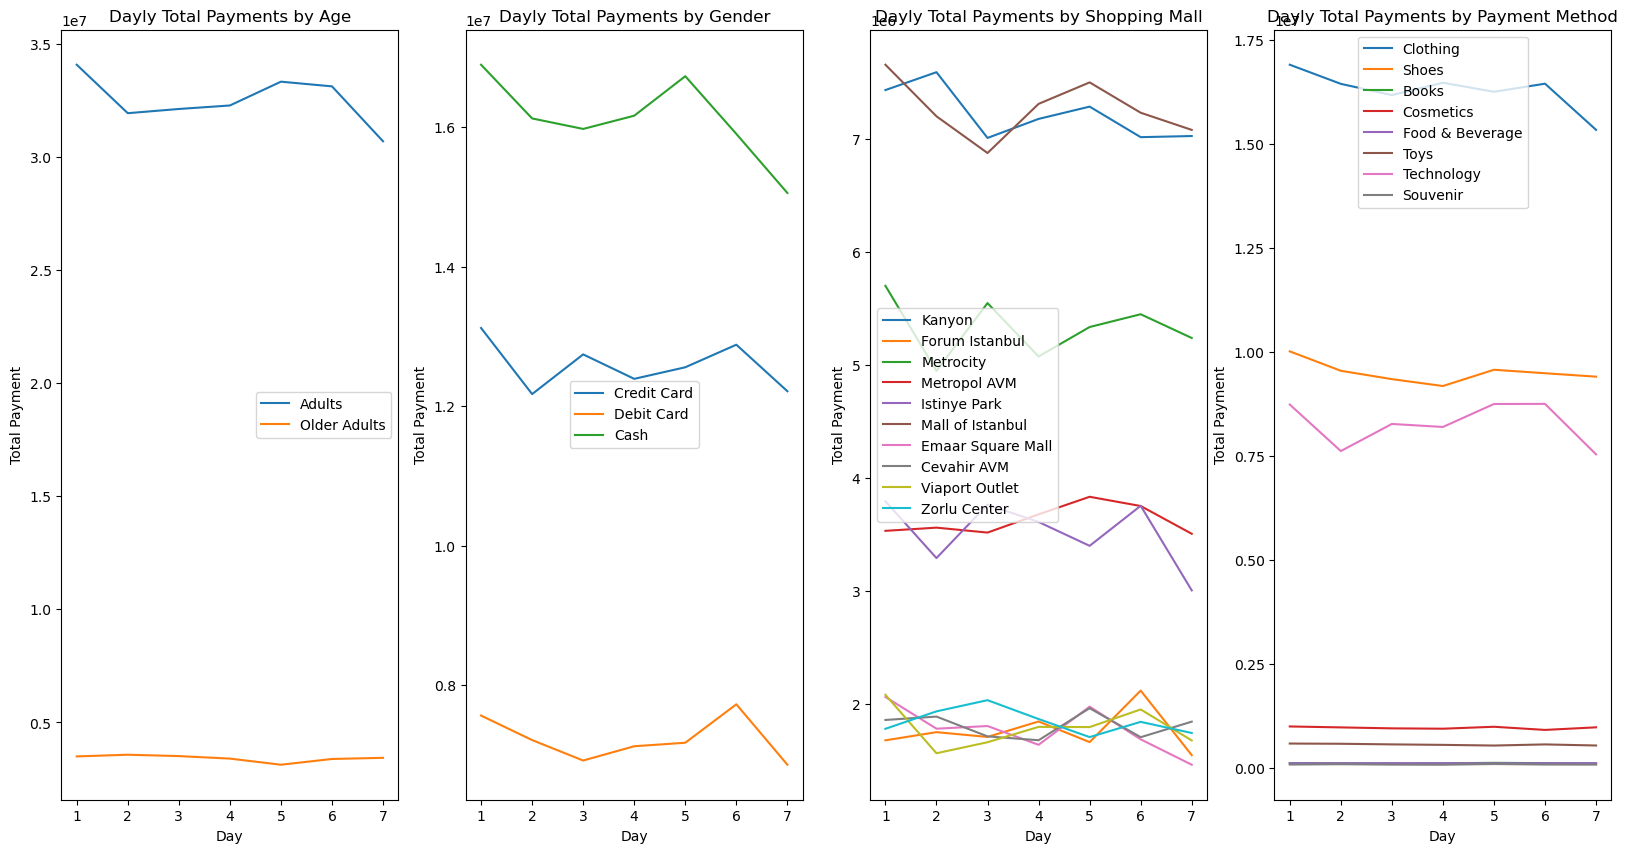

In [189]:
#Most Total Transaction by Day
col = ['age_category', 'payment_method', 'shopping_mall', 'category']
plt.tight_layout(pad = 5)
fig, axs = plt.subplots(ncols=4, figsize = (20,10))
for i in range(len(col)):
    df_group = df.pivot_table(index = 'new_day', columns = col[i],
                             values = 'total_payment', aggfunc = 'sum')\
    .reset_index()
    col_un = df[col[i]].unique()
    for u in range(len(col_un)):
        axs[i].plot(df_group['new_day'], df_group[col_un[u]], label = col_un[u])
        axs[i].legend()
        axs[i].set(title = f'Dayly Total Payments by {title[i]}',
                  xlabel = 'Day', ylabel='Total Payment')

<Figure size 640x480 with 0 Axes>

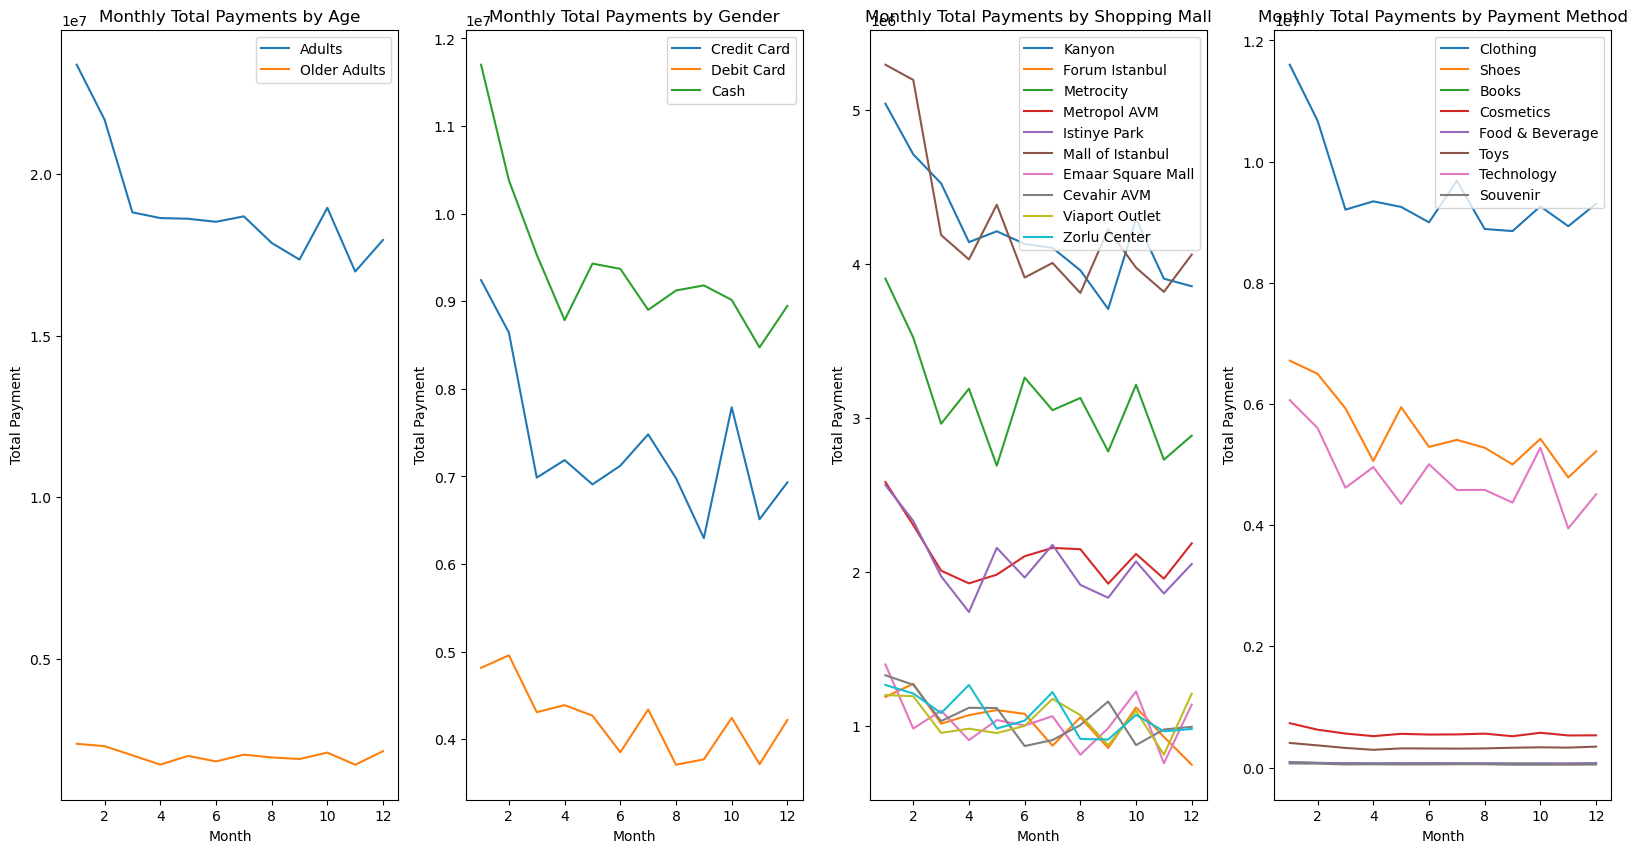

In [190]:
#Most Total Transaction by Month
col = ['age_category', 'payment_method', 'shopping_mall', 'category']
plt.tight_layout(pad = 5)
fig, axs = plt.subplots(ncols=4, figsize = (20,10))
for i in range(len(col)):
    df_group = df.pivot_table(index = 'month', columns = col[i],
                             values = 'total_payment', aggfunc = 'sum')\
    .reset_index()
    col_un = df[col[i]].unique()
    for u in range(len(col_un)):
        axs[i].plot(df_group['month'], df_group[col_un[u]], label = col_un[u])
        axs[i].legend()
        axs[i].set(title = f'Monthly Total Payments by {title[i]}',
                  xlabel = 'Month', ylabel='Total Payment')